In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/NLP/export 2.csv')

# Display the first few rows of the dataset to understand its structure
print("Initial Data:")
print(df.head())

<ipython-input-1-df87656d3cad>:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/NLP/export 2.csv')


Initial Data:
                            user_id   age     sex country checkin_date  \
0  QEVuQwEABlEzkh7fsBBjEe26RyIVcg==   NaN     NaN     NaN   2015-11-26   
1  QEVuQwEAWRNGnuTRqXG2996KSkTIEw==  32.0    male      US   2015-11-26   
2  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
3  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
4  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   

  trackable_id trackable_type  \
0         1069      Condition   
1         1069      Condition   
2         3168      Condition   
3         3169      Condition   
4         3170      Condition   

                                      trackable_name trackable_value  
0                                 Ulcerative colitis               0  
1                                 Ulcerative colitis               0  
2  pain in left upper arm felt like i was getting...               4  
3                            hip pain when gettin up      

In [ ]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                                 user_id           age      sex  country  \
count                            7976223  7.666997e+06  7844088  7678238   
unique                             42283           NaN        4      164   
top     QEVuQwEAmS9U3RAfpAoxDeyaHuHfNQ==           NaN   female       US   
freq                               69187           NaN  6478402  4690209   
mean                                 NaN  3.506967e+01      NaN      NaN   
std                                  NaN  1.437926e+02      NaN      NaN   
min                                  NaN -1.966910e+05      NaN      NaN   
25%                                  NaN  2.600000e+01      NaN      NaN   
50%                                  NaN  3.400000e+01      NaN      NaN   
75%                                  NaN  4.300000e+01      NaN      NaN   
max                                  NaN  2.018000e+03      NaN      NaN   

       checkin_date trackable_id trackable_type trackable_name tra

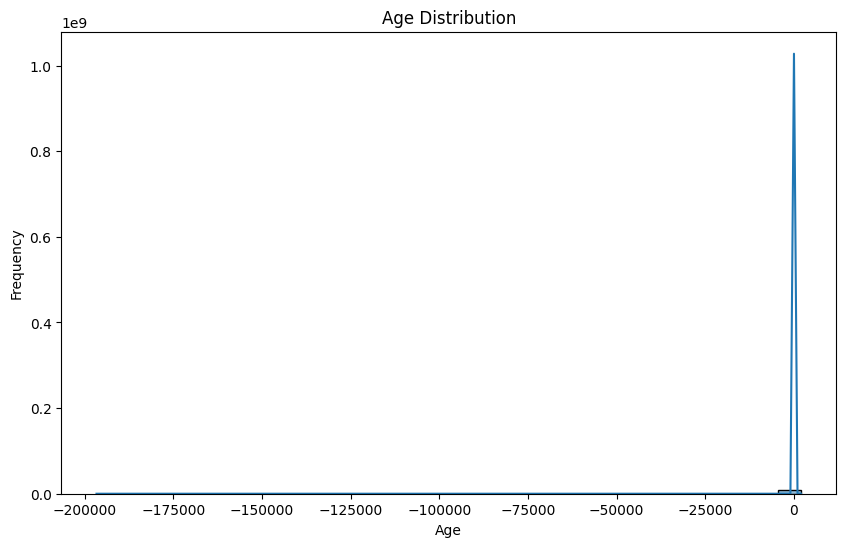

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

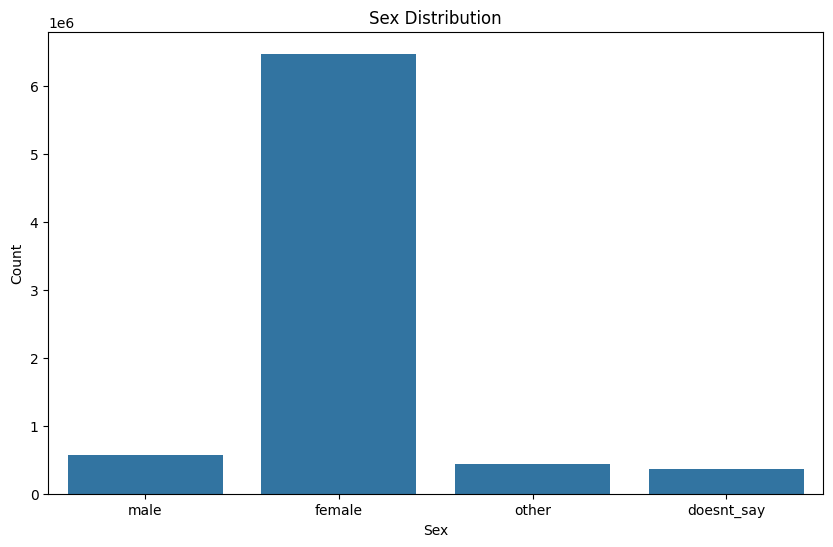

In [ ]:
# Distribution of sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

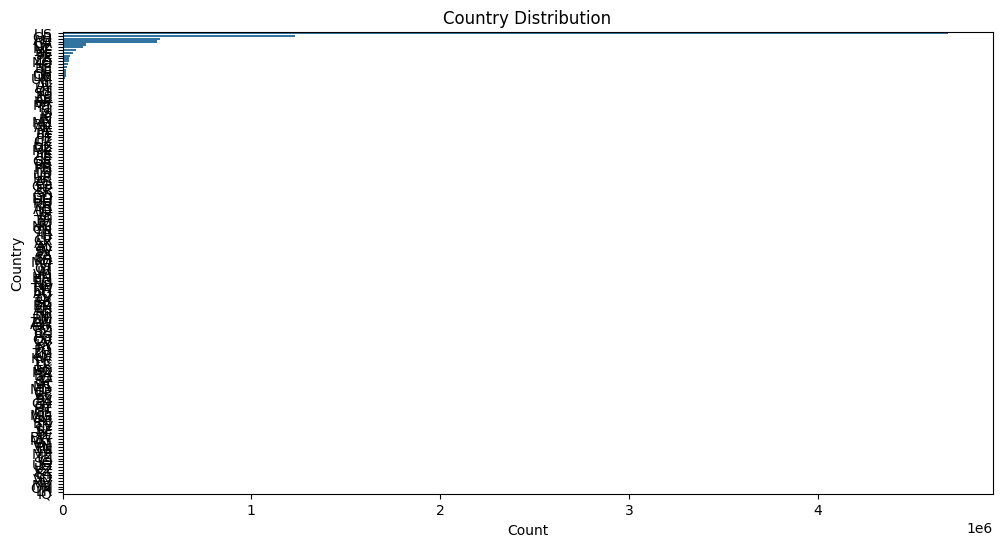

In [ ]:
# Distribution of country
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.title('Country Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

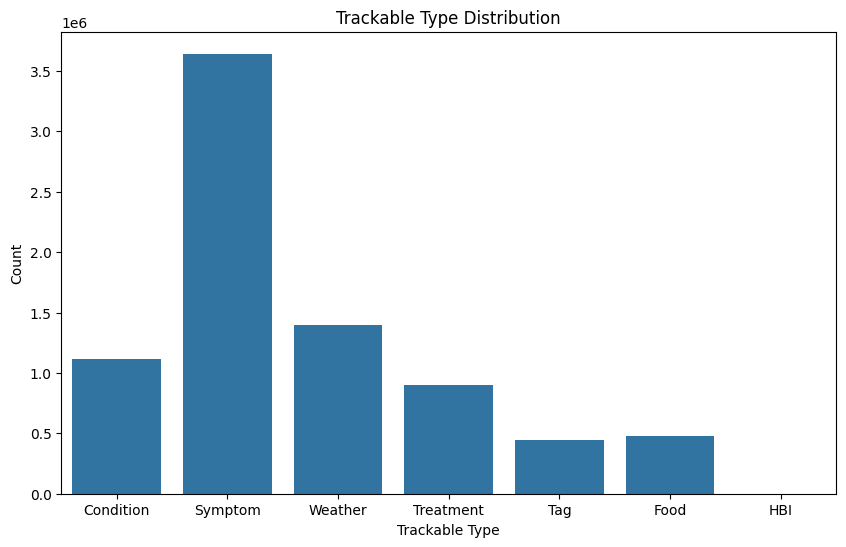

In [ ]:
# Distribution of trackable types
plt.figure(figsize=(10, 6))
sns.countplot(x='trackable_type', data=df)
plt.title('Trackable Type Distribution')
plt.xlabel('Trackable Type')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


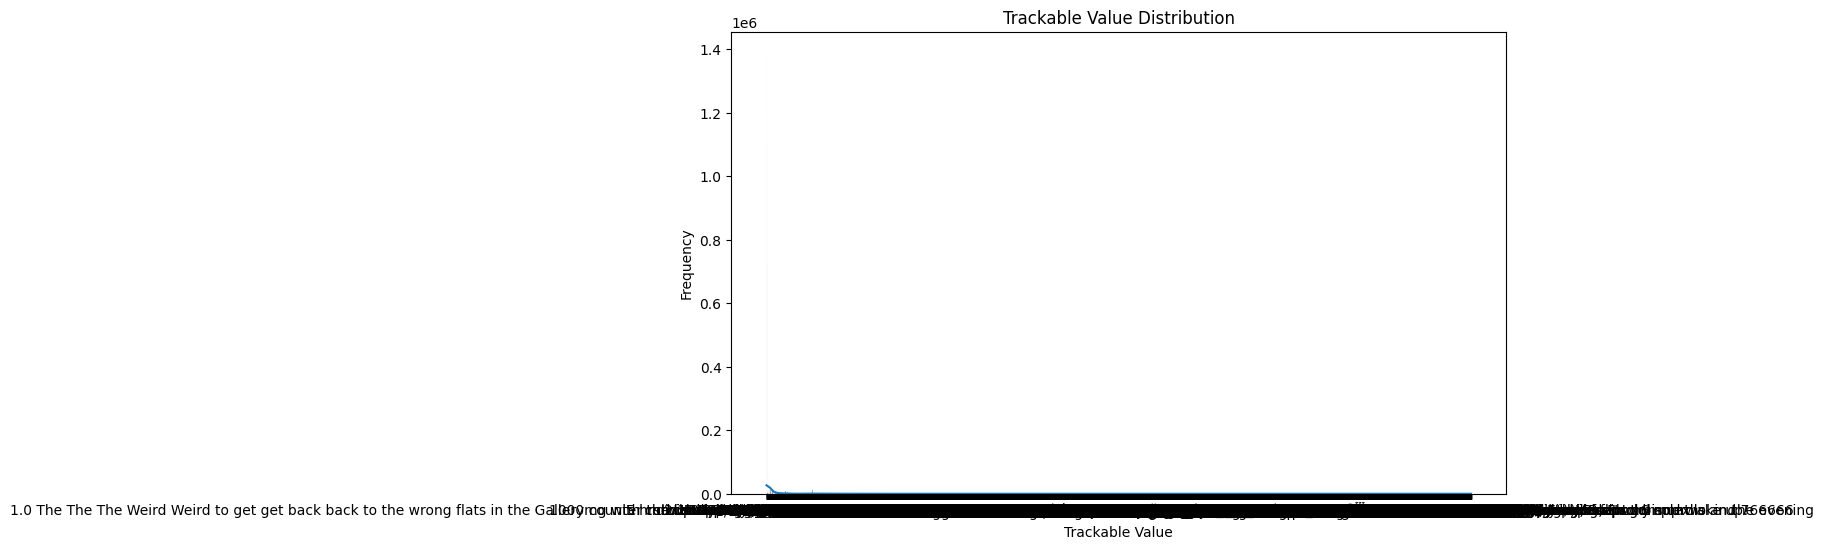

In [ ]:
# Distribution of trackable values
plt.figure(figsize=(10, 6))
sns.histplot(df['trackable_value'].dropna(), kde=True, bins=30)
plt.title('Trackable Value Distribution')
plt.xlabel('Trackable Value')
plt.ylabel('Frequency')
plt.show()

Number of labels: 2
Labels: ['Condition' 'Symptom']


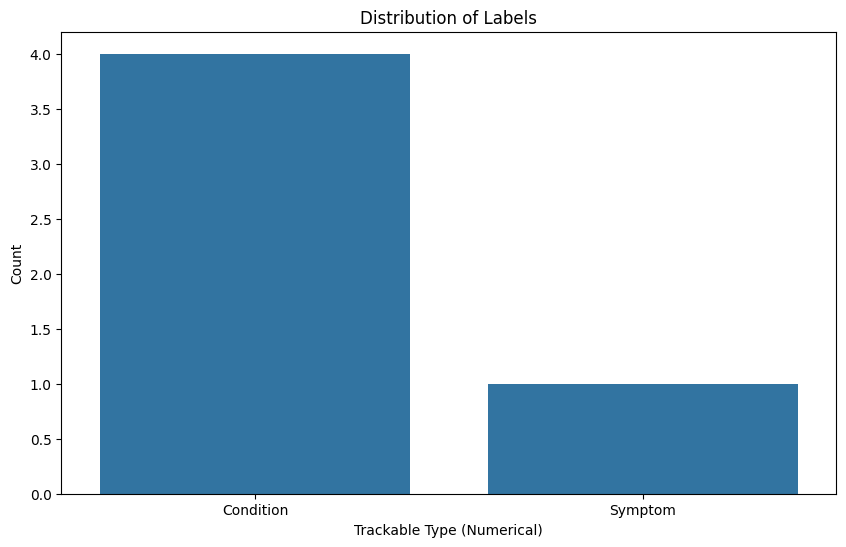

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Load the dataset from the provided content
csv_content = """user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,,,,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32,male,US,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3168,Condition,pain in left upper arm felt like i was getting a shot,4
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3169,Condition,hip pain when gettin up,3
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,,,,26/05/2015,,Symptom,Nausea,
"""

# Use StringIO to simulate reading from a file
df = pd.read_csv(StringIO(csv_content))

# Identify labels in the dataset
labels = df['trackable_type'].unique()
num_labels = len(labels)

# Print the labels and their count
print(f"Number of labels: {num_labels}")
print(f"Labels: {labels}")

# Convert categorical labels to numerical values
df['trackable_type_num'] = df['trackable_type'].astype('category').cat.codes

# Visualize the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='trackable_type_num', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Trackable Type (Numerical)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=labels)
plt.show()

In [ ]:
df['tokens'] = df['trackable_name'].apply(lambda x: x.lower().split() if isinstance(x, str) else x)

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x] if isinstance(x, list) else x)

In [ ]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x] if isinstance(x, list) else x)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['trackable_name'].dropna())

In [ ]:
import nltk
nltk.download('all')  # Download the 'punkt' resource for word_tokenize

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

df['tokens'] = df['trackable_name'].apply(lambda x: word_tokenize(x.lower()) if isinstance(x, str) else x)
df['pos_tags'] = df['tokens'].apply(lambda x: pos_tag(x) if isinstance(x, list) else x)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [ ]:
import nltk
from nltk.chunk import ne_chunk # Import the ne_chunk function
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize


df['tokens'] = df['trackable_name'].apply(lambda x: word_tokenize(x.lower()) if isinstance(x, str) else x)
df['pos_tags'] = df['tokens'].apply(lambda x: pos_tag(x) if isinstance(x, list) else x)
df['ner'] = df['tokens'].apply(lambda x: ne_chunk(pos_tag(x)) if isinstance(x, list) else x)

In [ ]:
df['ner'] = df['tokens'].apply(lambda x: ne_chunk(pos_tag(x)) if isinstance(x, list) else x)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['trackable_name'].dropna())

In [ ]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['trackable_name'].dropna())


In [ ]:
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset from the provided content
csv_content = """user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,,,,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32,male,US,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3168,Condition,pain in left upper arm felt like i was getting a shot,4
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3169,Condition,hip pain when gettin up,3
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,,,,26/05/2015,,Symptom,Nausea,
"""

# Use StringIO to simulate reading from a file
df = pd.read_csv(StringIO(csv_content))

# N-grams (Bigrams)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform(df['trackable_name'].dropna())

# Display the preprocessed data
bigram_matrix.toarray(), bigram_vectorizer.get_feature_names_out()

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array(['arm felt', 'felt like', 'gettin up', 'getting shot', 'hip pain',
        'in left', 'left upper', 'like was', 'pain in', 'pain when',
        'ulcerative colitis', 'upper arm', 'was getting', 'when gettin'],
       dtype=object))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from the provided content
csv_content = """user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,,,,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32,male,US,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3168,Condition,pain in left upper arm felt like i was getting a shot,4
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3169,Condition,hip pain when gettin up,3
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,,,,26/05/2015,,Symptom,Nausea,
"""

# Use StringIO to simulate reading from a file
from io import StringIO
df = pd.read_csv(StringIO(csv_content))

# Convert categorical labels to numerical values
df['trackable_type_num'] = df['trackable_type'].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['trackable_name'].dropna(), df['trackable_type_num'].dropna(), test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n\n    accuracy                           1.00         1\n   macro avg       1.00      1.00      1.00         1\nweighted avg       1.00      1.00      1.00         1\n')

In [12]:
# prompt:  apply two models like ML based Models Like Naïve Bayes and Logistic

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  # Import train_test_split
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report


# Load the dataset from the provided content
csv_content = """user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,,,,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32,male,US,26/11/2015,1069,Condition,Ulcerative colitis,0
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3168,Condition,pain in left upper arm felt like i was getting a shot,4
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2,female,CA,28/04/2017,3169,Condition,hip pain when gettin up,3
QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,,,,26/05/2015,,Symptom,Nausea,
"""

# Use StringIO to simulate reading from a file
df = pd.read_csv(StringIO(csv_content))

# ... (Your existing code) ...

# Convert categorical labels to numerical values
df['trackable_type_num'] = df['trackable_type'].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['trackable_name'].dropna(), df['trackable_type_num'].dropna(), test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression classifier
logistic_clf = LogisticRegression(max_iter=1000)  # Increased max_iter
logistic_clf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_logistic = logistic_clf.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Classification Report:\n{report_logistic}")

# ... (Your existing Naive Bayes code) ...

print("\nNaive Bayes Results:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Logistic Regression Results:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Naive Bayes Results:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

